In [1]:
import os
import pandas as pd
import csv
import numpy as np
import time

from datetime import datetime
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

log_path = "/home/aayush/accelerometer/accprocess/results/confusion_matrix_output/logs"
predicted_data_path = "/home/aayush/accelerometer/accprocess/results"
# predicted_data_path = "/home/aayush/accelerometer/accprocess/test"
annotated_data_path = "/home/yacine/accel/capture24/participants/"
# annotated_data_path = "/home/aayush/accelerometer/accprocess/test"

labels_dict_location = "/home/aayush/accelerometer/accprocess/anno-label.csv"
confusion_matrix_location = "/home/aayush/accelerometer/accprocess/results/confusion_matrix_output"

In [2]:
class logger:
    def __init__(self) -> None:
        timestamp = datetime.now().strftime("%m-%d-%Y-%H-%M-%S")
        log = f"{log_path}/Process_data_{timestamp}.log"
        # with open(log, "w") as log_file_save:
        #     log_file_save.write("################################################\n")
        #     log_file_save.write("|Timestamp| + \t + |Func| + \t + |Message|\n")
        # self.log_file = log
    
    def log(self, func, message) -> None:
        # with open(self.log_file, "a") as log_file_save:
        #     timestamp = datetime.now().strftime("%m-%d-%Y-%H-%M-%S")
        #     log_message = timestamp + "\t" + func + "\t" + message
        #     log_file_save.write(log_message + "\n")

        timestamp = datetime.now().strftime("%m-%d-%Y-%H-%M-%S")
        log_message = timestamp + "\t" + func + "\t" + message
        print(log_message)

logging = logger()

In [3]:
def get_files(data_path, predicted_files=False, annotated_files=False) -> None:
    total_csv_zipped = []
    for path, dirnames, filenames in os.walk(data_path):
        logging.log("get_files", f"Looking for data files in {path}.")
        for file in filenames:
            if file.endswith(".csv.gz") and predicted_files:
                # paths contains the base directory for that file.
                # dirnames contains other directories within this folder.
                # filenames contains the list of filenames within path.
                total_csv_zipped.append(os.path.join(path, file))
                logging.log("get_files", f"Found FILE:{file} in PATH:{path}.")
                
            if file.endswith(".csv") and annotated_files and file[0]!='c': #ignore the capture24 file
                # paths contains the base directory for that file.
                # dirnames contains other directories within this folder.
                # filenames contains the list of filenames within path.
                total_csv_zipped.append(os.path.join(path, file))
                logging.log("get_files", f"Found FILE:{file} in PATH:{path}.")
    logging.log("get_files", "#################################################################################")
    logging.log("get_files", f"######### Total files in the data path: {len(total_csv_zipped)} #########")
    logging.log("get_files", "#################################################################################")
    return sorted(total_csv_zipped)

In [4]:
def create_labels_dict():
    logging.log("create_labels_dict", "Created labels dict for mapping.")
    labels_dict = {}
    with open(labels_dict_location, "r") as annotation_dict:
        reader = csv.DictReader(annotation_dict)
        for row in reader:
            if labels_dict.get(row['annotation']) is None:
                labels_dict[row['annotation']] = [row['label:Walmsley2020']]
            else:
                labels_dict[row['annotation']].append(row['label:Walmsley2020'])
    return labels_dict


def parse_datetime(dt_string):
    clean_datetime_str = dt_string.split('[')[0].strip()
    dt_object = pd.to_datetime(clean_datetime_str)
    return dt_object


def parse_datetime_df_time(dt_string):
    clean_datetime_str = dt_string.split('[')[0].strip()
    clean_datetime_str = clean_datetime_str.split('+')[0].strip()
    dt_object = pd.to_datetime(clean_datetime_str)
    return dt_object

In [5]:
def create_confusion_matrix(actual_labels_cleaned, df_cleaned_filtered):
    assert len(actual_labels_cleaned) == len(df_cleaned_filtered), "DataFrames must be of the same length"

    true_labels = actual_labels_cleaned['annotation']
    predicted_labels = df_cleaned_filtered['activity_predicted']

    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels, labels=['light', 'moderate-vigorous', 'sedentary', 'sleep'])
    
    logging.log("create_confusion_matrix", "Created confusion matrix.")
    return cm


def display_confusion_matrix(cm, normalize=True):
    logging.log("display_confusion_matrix", "Display confusion matrix.")
    import matplotlib.pyplot as plt
    
    if normalize:
    # Normalize by true values
        cm = cm.astype(float)
        row_sums = cm.sum(axis=1)

        # Avoid division by zero; replace zeros with ones (or a very small number) in the denominator
        row_sums[row_sums == 0] = 1

        # Normalize each row
        cm = cm / row_sums[:, np.newaxis]

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['light', 'mod-vigorous', 'sedentary', 'sleep'])
    disp.plot(cmap='Blues')
    plt.savefig(os.path.join(confusion_matrix_location, datetime.now().strftime("%m-%d-%Y-%H-%M-%S") + ".png"))


In [6]:
predicted_data_files = get_files(data_path=predicted_data_path, predicted_files=True)
annotated_data_files = get_files(data_path=annotated_data_path, annotated_files=True)
assert len(predicted_data_files) == len(annotated_data_files), "Number of predicted and annotated data files should be the same."

labels_dict = create_labels_dict()

labels = ["light", "moderate-vigorous", "sedentary", "sleep"]
combined_cm = np.zeros((len(labels), len(labels)), dtype=float)

05-22-2024-12-12-25	get_files	Looking for data files in /home/aayush/accelerometer/accprocess/results.
05-22-2024-12-12-25	get_files	Found FILE:P113-timeSeries.csv.gz in PATH:/home/aayush/accelerometer/accprocess/results.
05-22-2024-12-12-25	get_files	Found FILE:P147-timeSeries.csv.gz in PATH:/home/aayush/accelerometer/accprocess/results.
05-22-2024-12-12-25	get_files	Found FILE:P076-timeSeries.csv.gz in PATH:/home/aayush/accelerometer/accprocess/results.
05-22-2024-12-12-25	get_files	Found FILE:P093-timeSeries.csv.gz in PATH:/home/aayush/accelerometer/accprocess/results.
05-22-2024-12-12-25	get_files	Found FILE:P070-timeSeries.csv.gz in PATH:/home/aayush/accelerometer/accprocess/results.
05-22-2024-12-12-25	get_files	Found FILE:P121-timeSeries.csv.gz in PATH:/home/aayush/accelerometer/accprocess/results.
05-22-2024-12-12-25	get_files	Found FILE:P062-timeSeries.csv.gz in PATH:/home/aayush/accelerometer/accprocess/results.
05-22-2024-12-12-25	get_files	Found FILE:P065-timeSeries.csv.gz 

In [7]:
def decode_activities(data_file):
    logging.log("decode_activities", f"Decode the activities from file: {data_file}.")
    df = pd.read_csv(data_file)
    
    # retrieve only the activities headers
    activities = df[df.columns.values.tolist()[2:6]]
    
    # whichever activity is depicted by 1, use it as the predicted activity
    out = activities[activities==1].idxmax(axis=1)
    df["activity_predicted"] = out
    
    logging.log("decode_activities", f"Dropped 'nan' activity_predicted from file: {data_file}.")
    df_cleaned = df.dropna(subset=["activity_predicted"])
    return df_cleaned, df
    
    
def process_annotated_data(annotated_data_file):
    logging.log("process_annotated_data", f"Process annotated data file: {annotated_data_file}.")
    
    annotated_data = pd.read_csv(annotated_data_file)
    # Take the timestamp after every thirty seconds
    actual_labels = annotated_data[["annotation", "time"]][0::3000]
    
    # Convert to datetime object
    actual_time = actual_labels["time"].apply(parse_datetime)
    actual_labels["time"] = actual_time
    
    return actual_labels
    


def filtering_data(df_cleaned, actual_labels, labels_dict):
    
    # Convert to datetime object
    df_cleaned_time = df_cleaned['time'].apply(parse_datetime_df_time)
    df_cleaned['time_cleaned'] = df_cleaned_time
    
    # drop all 'nan' rows from actual labels    
    actual_labels = actual_labels.dropna(subset=['annotation'])
        
    # Filter out all those timestamps which do not exist in df_cleaned_time
    actual_labels = actual_labels[actual_labels["time"].isin(df_cleaned_time)]
    
    # Filter out all those timestamps which do not exist in actual_labels
    df_cleaned_filtered = df_cleaned[df_cleaned['time_cleaned'].isin(actual_labels["time"])]
    
    # Remove all duplicated timestamps from df_cleaned_filtered
    df_cleaned_filtered_dedup = df_cleaned_filtered[~df_cleaned_filtered['time_cleaned'].duplicated(keep='first')]
    
    # replace the annotated labels with the same format of strings as predicted labels using mapping from labels_dict
    flat_dict = {k: v[0] for k, v in labels_dict.items()}
    
    actual_labels['annotation'].replace(flat_dict, inplace=True)
    return actual_labels, df_cleaned_filtered_dedup

In [8]:
df_cleaned_all = []
df_original_all = []

actual_labels_all = []
actual_labels_cleaned_all = []

for predicted_file, annotated_file in zip(predicted_data_files[0:8], annotated_data_files[0:8]):
    logging.log("main", f"Processing predicted_file: {predicted_file} and annotated_file:{annotated_file}")

    # In this step we drop the activities which are NaN from the predicted data file
    df_cleaned, df_original = decode_activities(predicted_file)

    # We process the strings to timestamps for annotated file
    actual_labels = process_annotated_data(annotated_file)

    # In this step:
    # We convert the strings to timestamps for cleaned predicted data file
    # drop all 'nan' rows from actual labels
    # Filter out all those timestamps which do not exist in df_cleaned_time
    # Filter out all those timestamps which do not exist in actual_labels
    # Remove all duplicated timestamps from df_cleaned_filtered
    # replace the annotated labels with the same format of strings as predicted labels using mapping from labels_dict
    actual_labels_cleaned, df_cleaned_filtered = filtering_data(df_cleaned, actual_labels, labels_dict)
    
    cm = create_confusion_matrix(actual_labels_cleaned, df_cleaned_filtered)
    combined_cm += cm

    df_cleaned_all.append(df_cleaned_filtered)
    df_original_all.append(df_original)
    
    actual_labels_all.append(actual_labels)
    actual_labels_cleaned_all.append(actual_labels_cleaned)

05-22-2024-12-13-07	main	Processing predicted_file: /home/aayush/accelerometer/accprocess/results/P001-timeSeries.csv.gz and annotated_file:/home/yacine/accel/capture24/participants/P001.csv
05-22-2024-12-13-07	decode_activities	Decode the activities from file: /home/aayush/accelerometer/accprocess/results/P001-timeSeries.csv.gz.
05-22-2024-12-13-07	decode_activities	Dropped 'nan' activity_predicted from file: /home/aayush/accelerometer/accprocess/results/P001-timeSeries.csv.gz.
05-22-2024-12-13-07	process_annotated_data	Process annotated data file: /home/yacine/accel/capture24/participants/P001.csv.


/tmp/ipykernel_979212/2350033512.py:9: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  out = activities[activities==1].idxmax(axis=1)
/tmp/ipykernel_979212/2350033512.py:20: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  annotated_data = pd.read_csv(annotated_data_file)
/tmp/ipykernel_979212/2350033512.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['time_cleaned'] = df_cleaned_time
/tmp/ipykernel_979212/2350033512.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will

05-22-2024-12-13-22	create_confusion_matrix	Created confusion matrix.
05-22-2024-12-13-22	main	Processing predicted_file: /home/aayush/accelerometer/accprocess/results/P002-timeSeries.csv.gz and annotated_file:/home/yacine/accel/capture24/participants/P002.csv
05-22-2024-12-13-22	decode_activities	Decode the activities from file: /home/aayush/accelerometer/accprocess/results/P002-timeSeries.csv.gz.
05-22-2024-12-13-22	decode_activities	Dropped 'nan' activity_predicted from file: /home/aayush/accelerometer/accprocess/results/P002-timeSeries.csv.gz.
05-22-2024-12-13-22	process_annotated_data	Process annotated data file: /home/yacine/accel/capture24/participants/P002.csv.


/tmp/ipykernel_979212/2350033512.py:20: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  annotated_data = pd.read_csv(annotated_data_file)
/tmp/ipykernel_979212/2350033512.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  actual_labels['annotation'].replace(flat_dict, inplace=True)


05-22-2024-12-13-35	create_confusion_matrix	Created confusion matrix.
05-22-2024-12-13-35	main	Processing predicted_file: /home/aayush/accelerometer/accprocess/results/P003-timeSeries.csv.gz and annotated_file:/home/yacine/accel/capture24/participants/P003.csv
05-22-2024-12-13-35	decode_activities	Decode the activities from file: /home/aayush/accelerometer/accprocess/results/P003-timeSeries.csv.gz.
05-22-2024-12-13-35	decode_activities	Dropped 'nan' activity_predicted from file: /home/aayush/accelerometer/accprocess/results/P003-timeSeries.csv.gz.
05-22-2024-12-13-35	process_annotated_data	Process annotated data file: /home/yacine/accel/capture24/participants/P003.csv.


/tmp/ipykernel_979212/2350033512.py:20: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  annotated_data = pd.read_csv(annotated_data_file)
/tmp/ipykernel_979212/2350033512.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  actual_labels['annotation'].replace(flat_dict, inplace=True)


05-22-2024-12-13-50	create_confusion_matrix	Created confusion matrix.
05-22-2024-12-13-50	main	Processing predicted_file: /home/aayush/accelerometer/accprocess/results/P004-timeSeries.csv.gz and annotated_file:/home/yacine/accel/capture24/participants/P004.csv
05-22-2024-12-13-50	decode_activities	Decode the activities from file: /home/aayush/accelerometer/accprocess/results/P004-timeSeries.csv.gz.
05-22-2024-12-13-50	decode_activities	Dropped 'nan' activity_predicted from file: /home/aayush/accelerometer/accprocess/results/P004-timeSeries.csv.gz.
05-22-2024-12-13-50	process_annotated_data	Process annotated data file: /home/yacine/accel/capture24/participants/P004.csv.


/tmp/ipykernel_979212/2350033512.py:20: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  annotated_data = pd.read_csv(annotated_data_file)
/tmp/ipykernel_979212/2350033512.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  actual_labels['annotation'].replace(flat_dict, inplace=True)
/tmp/ipykernel_979212/2350033512.py:9: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueEr

05-22-2024-12-14-02	create_confusion_matrix	Created confusion matrix.
05-22-2024-12-14-02	main	Processing predicted_file: /home/aayush/accelerometer/accprocess/results/P005-timeSeries.csv.gz and annotated_file:/home/yacine/accel/capture24/participants/P005.csv
05-22-2024-12-14-02	decode_activities	Decode the activities from file: /home/aayush/accelerometer/accprocess/results/P005-timeSeries.csv.gz.
05-22-2024-12-14-02	decode_activities	Dropped 'nan' activity_predicted from file: /home/aayush/accelerometer/accprocess/results/P005-timeSeries.csv.gz.
05-22-2024-12-14-02	process_annotated_data	Process annotated data file: /home/yacine/accel/capture24/participants/P005.csv.


/tmp/ipykernel_979212/2350033512.py:20: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  annotated_data = pd.read_csv(annotated_data_file)
/tmp/ipykernel_979212/2350033512.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['time_cleaned'] = df_cleaned_time
/tmp/ipykernel_979212/2350033512.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value},

05-22-2024-12-14-16	create_confusion_matrix	Created confusion matrix.
05-22-2024-12-14-16	main	Processing predicted_file: /home/aayush/accelerometer/accprocess/results/P006-timeSeries.csv.gz and annotated_file:/home/yacine/accel/capture24/participants/P006.csv
05-22-2024-12-14-16	decode_activities	Decode the activities from file: /home/aayush/accelerometer/accprocess/results/P006-timeSeries.csv.gz.
05-22-2024-12-14-16	decode_activities	Dropped 'nan' activity_predicted from file: /home/aayush/accelerometer/accprocess/results/P006-timeSeries.csv.gz.
05-22-2024-12-14-16	process_annotated_data	Process annotated data file: /home/yacine/accel/capture24/participants/P006.csv.


/tmp/ipykernel_979212/2350033512.py:20: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  annotated_data = pd.read_csv(annotated_data_file)
/tmp/ipykernel_979212/2350033512.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  actual_labels['annotation'].replace(flat_dict, inplace=True)


05-22-2024-12-14-33	create_confusion_matrix	Created confusion matrix.
05-22-2024-12-14-33	main	Processing predicted_file: /home/aayush/accelerometer/accprocess/results/P007-timeSeries.csv.gz and annotated_file:/home/yacine/accel/capture24/participants/P007.csv
05-22-2024-12-14-33	decode_activities	Decode the activities from file: /home/aayush/accelerometer/accprocess/results/P007-timeSeries.csv.gz.
05-22-2024-12-14-33	decode_activities	Dropped 'nan' activity_predicted from file: /home/aayush/accelerometer/accprocess/results/P007-timeSeries.csv.gz.
05-22-2024-12-14-33	process_annotated_data	Process annotated data file: /home/yacine/accel/capture24/participants/P007.csv.


/tmp/ipykernel_979212/2350033512.py:20: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  annotated_data = pd.read_csv(annotated_data_file)
/tmp/ipykernel_979212/2350033512.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  actual_labels['annotation'].replace(flat_dict, inplace=True)
/tmp/ipykernel_979212/2350033512.py:9: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueEr

05-22-2024-12-14-48	create_confusion_matrix	Created confusion matrix.
05-22-2024-12-14-48	main	Processing predicted_file: /home/aayush/accelerometer/accprocess/results/P008-timeSeries.csv.gz and annotated_file:/home/yacine/accel/capture24/participants/P008.csv
05-22-2024-12-14-48	decode_activities	Decode the activities from file: /home/aayush/accelerometer/accprocess/results/P008-timeSeries.csv.gz.
05-22-2024-12-14-48	decode_activities	Dropped 'nan' activity_predicted from file: /home/aayush/accelerometer/accprocess/results/P008-timeSeries.csv.gz.
05-22-2024-12-14-48	process_annotated_data	Process annotated data file: /home/yacine/accel/capture24/participants/P008.csv.


/tmp/ipykernel_979212/2350033512.py:20: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  annotated_data = pd.read_csv(annotated_data_file)


05-22-2024-12-15-02	create_confusion_matrix	Created confusion matrix.


/tmp/ipykernel_979212/2350033512.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['time_cleaned'] = df_cleaned_time
/tmp/ipykernel_979212/2350033512.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  actual_labels['annotation'].replace(flat_dict, inplace=True)


In [9]:
df_cleaned_all_pd = pd.concat(df_cleaned_all, ignore_index=True, axis=0)
df_original_all_pd = pd.concat(df_original_all, ignore_index=True, axis=0)

actual_labels_all_pd = pd.concat(actual_labels_all, ignore_index=True, axis=0)
actual_labels_cleaned_all_pd = pd.concat(actual_labels_cleaned_all, ignore_index=True, axis=0)

In [10]:
print(df_cleaned_all_pd)
print(df_original_all_pd)

print(actual_labels_all_pd)
print(actual_labels_cleaned_all_pd)

                                                  time      acc  light  \
0      2016-11-13 02:18:00.000000+0000 [Europe/London]    0.767    0.0   
1      2016-11-13 02:18:30.000000+0000 [Europe/London]    0.819    0.0   
2      2016-11-13 02:19:00.000000+0000 [Europe/London]    1.226    0.0   
3      2016-11-13 02:19:30.000000+0000 [Europe/London]    1.292    0.0   
4      2016-11-13 02:20:00.000000+0000 [Europe/London]    1.213    0.0   
...                                                ...      ...    ...   
16885  2016-03-10 13:25:00.000000+0000 [Europe/London]  118.041    1.0   
16886  2016-03-10 13:25:30.000000+0000 [Europe/London]   40.231    1.0   
16887  2016-03-10 13:26:00.000000+0000 [Europe/London]   30.327    1.0   
16888  2016-03-10 13:26:30.000000+0000 [Europe/London]   35.599    1.0   
16889  2016-03-10 13:27:00.000000+0000 [Europe/London]   56.100    1.0   

       moderate-vigorous  sedentary  sleep  CpSB  CpLPA  CpMPA  CpVPA  CpMVPA  \
0                    0.0      

05-22-2024-12-17-08	display_confusion_matrix	Display confusion matrix.


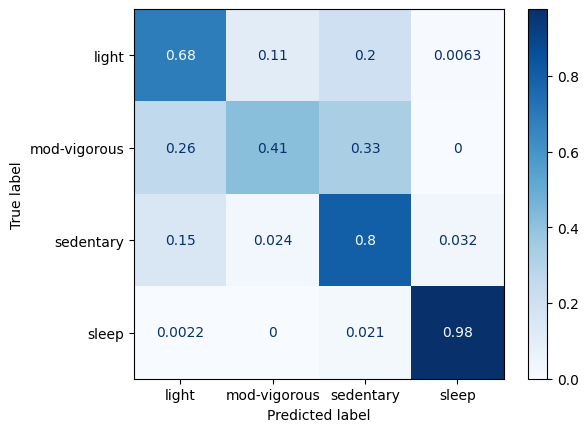

In [11]:
display_confusion_matrix(combined_cm, normalize=True)

05-22-2024-12-17-13	display_confusion_matrix	Display confusion matrix.


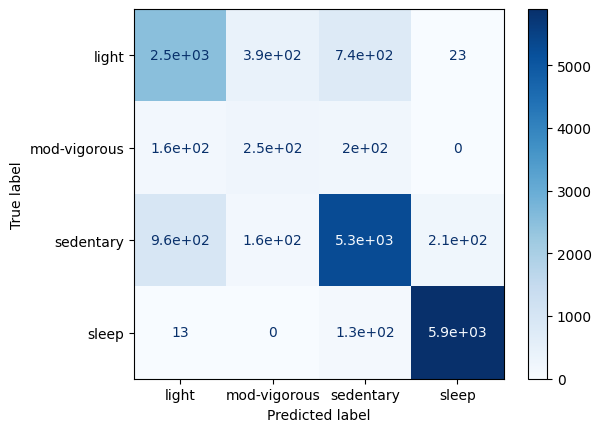

In [12]:
display_confusion_matrix(combined_cm, normalize=False)